# **Detectron2 Custom Training Tutorial**

---
---

## **Install detectron2**

In [1]:
pip install pyyaml==5.1


  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  2.0 ; cuda:  cu118


In [3]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2xh3lnth
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2xh3lnth
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4e80df1e58901557e2824ce3b488d30209a9be33
  Preparing metadata (setup.py) ... done


## **Import Necessary Libraries**

In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

## **Mount Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pwd

'/content'

## **Change Working Directory**

In [7]:
%cd /content/drive/MyDrive/INeuron | Detectron2/Card Type Prediction/1_DataPreparation

/content/drive/MyDrive/INeuron | Detectron2/Card Type Prediction/1_DataPreparation


## **Register Data**

Changes : Just locate the below folders against register_coco_instances

**output.json** file and **train** Folder

In [15]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("customtrain1", {}, "./output.json", "./train")

AssertionError: ignored

Note : **customtrain1** is the name of our Model

In [9]:
sample_metadata = MetadataCatalog.get("customtrain1")
dataset_dicts = DatasetCatalog.get("customtrain1")

WARNING [10/06 18:21:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/06 18:21:28 d2.data.datasets.coco]: Loaded 296 images in COCO format from ./output.json


### **Visual Representation of Loaded Data**

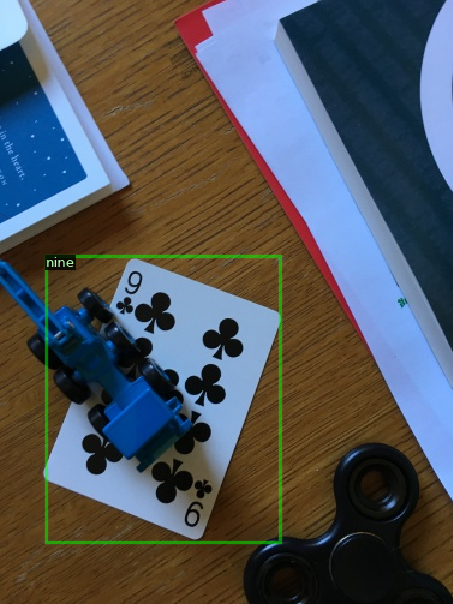

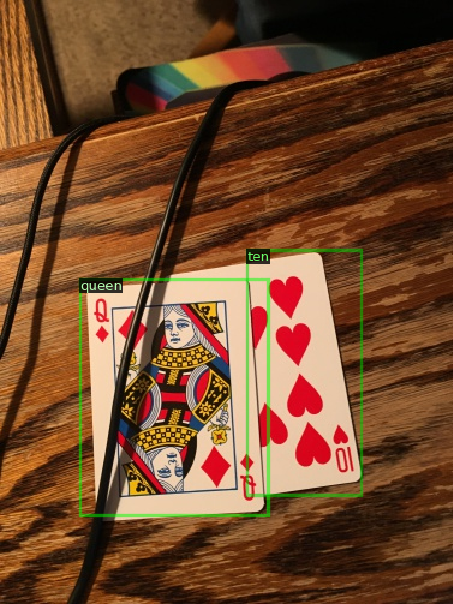

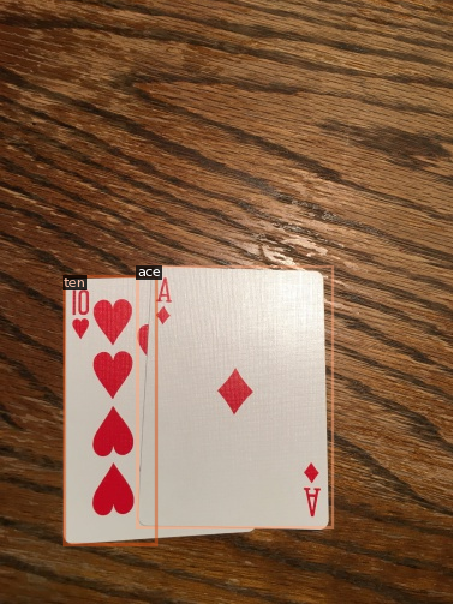

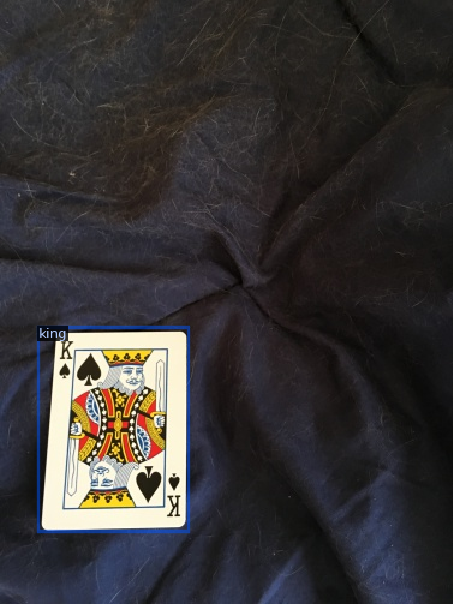

In [10]:
# Want to Check Loaded Data

import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    # Visualizer help us to Detect the Image with Label
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=1.2)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### **Data Training**

Note : This code was shared by the Detectron Designer and it remains same always

 1. we are using **faster_rcnn_R_50_FPN_3x** Model : It depends on the Data Set you are using  - It can be changed

 Models available in : https://github.com/facebookresearch/detectron2

 pick the Model from **Model Zoo and Baselines**

 Click on Model then seltect the model link from Link

 2. Change the Epoch by 300

In [11]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("customtrain1",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg.SOLVER.MAX_ITER = 500   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[10/06 18:21:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/06 18:21:30 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/06 18:21:38 d2.utils.events]:  eta: 0:02:51  iter: 19  total_loss: 2.607  loss_cls: 1.849  loss_box_reg: 0.7436  loss_rpn_cls: 0.003343  loss_rpn_loc: 0.005166    time: 0.3740  last_time: 0.4337  data_time: 0.0156  last_data_time: 0.0264   lr: 9.7405e-05  max_mem: 2546M
[10/06 18:21:56 d2.utils.events]:  eta: 0:03:04  iter: 39  total_loss: 1.493  loss_cls: 0.7634  loss_box_reg: 0.7171  loss_rpn_cls: 0.006834  loss_rpn_loc: 0.004156    time: 0.4110  last_time: 0.5969  data_time: 0.0158  last_data_time: 0.0189   lr: 0.00019731  max_mem: 2546M
[10/06 18:22:04 d2.utils.events]:  eta: 0:02:58  iter: 59  total_loss: 1.28  loss_cls: 0.5143  loss_box_reg: 0.7078  loss_rpn_cls: 0.0006009  loss_rpn_loc: 0.002754    time: 0.4153  last_time: 0.3972  data_time: 0.0222  last_data_time: 0.0150   lr: 0.0002972  max_mem: 2546M
[10/06 18:22:14 d2.utils.events]:  eta: 0:02:55  iter: 79  total_loss: 1.331  loss_cls: 0.5167  loss_box_reg: 0.8216  loss_rpn_cls: 0.0006114  loss_rpn_loc: 0.003133    time:

## **Load The Model**

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("customtrain1", )
predictor = DefaultPredictor(cfg)

[10/06 18:25:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


## **Visualize the Prediction**

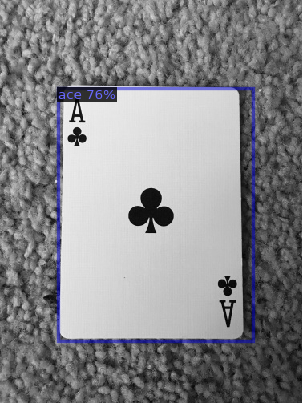

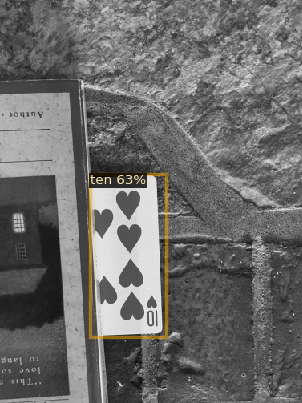

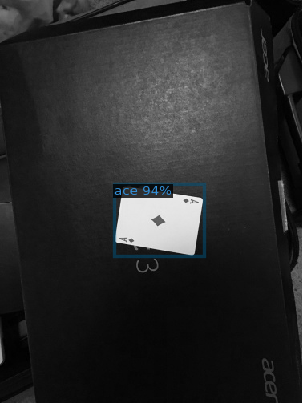

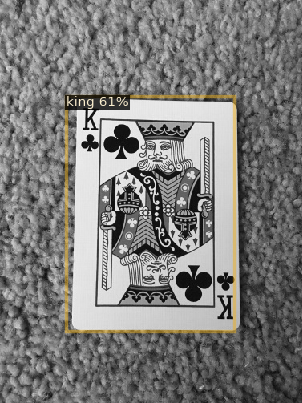

In [13]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

### **Evaluation Score (Performance of Model)**

In [14]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("customtrain1", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "customtrain1")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [10/06 18:25:17 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/06 18:25:17 d2.data.datasets.coco]: Loaded 296 images in COCO format from ./output.json
[10/06 18:25:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/06 18:25:17 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/06 18:25:17 d2.data.common]: Serializing 296 elements to byte tensors and concatenating them all ...
[10/06 18:25:17 d2.data.common]: Serialized dataset takes 0.07 MiB
[10/06 18:25:17 d2.evaluation.evaluator]: Start inference on 296 batches
[10/06 18:25:18 d2.evaluation.evaluator]: Inference done 11/296. Dataloading: 0.0015 s/iter. Inference: 0.1003 s/iter. Eval: 0.0003 s/iter. Total: 0.1020 s/iter. ETA=0:00:29
[10/06 18:25:23 d2.evaluation.evaluator]: Inference do